<a href="https://colab.research.google.com/github/aadhil96/TensorFlow_Transfer_learning_Cat_Dog/blob/main/Cat_and_Dog_Classification_using_Transfer_Learning_(VGG16_%2C_GoogLeNet_%2C_ResNet50_%2C_EfficientNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-02-07 14:27:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.217.9.208, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   103MB/s    in 0.6s    

2021-02-07 14:27:40 (103 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

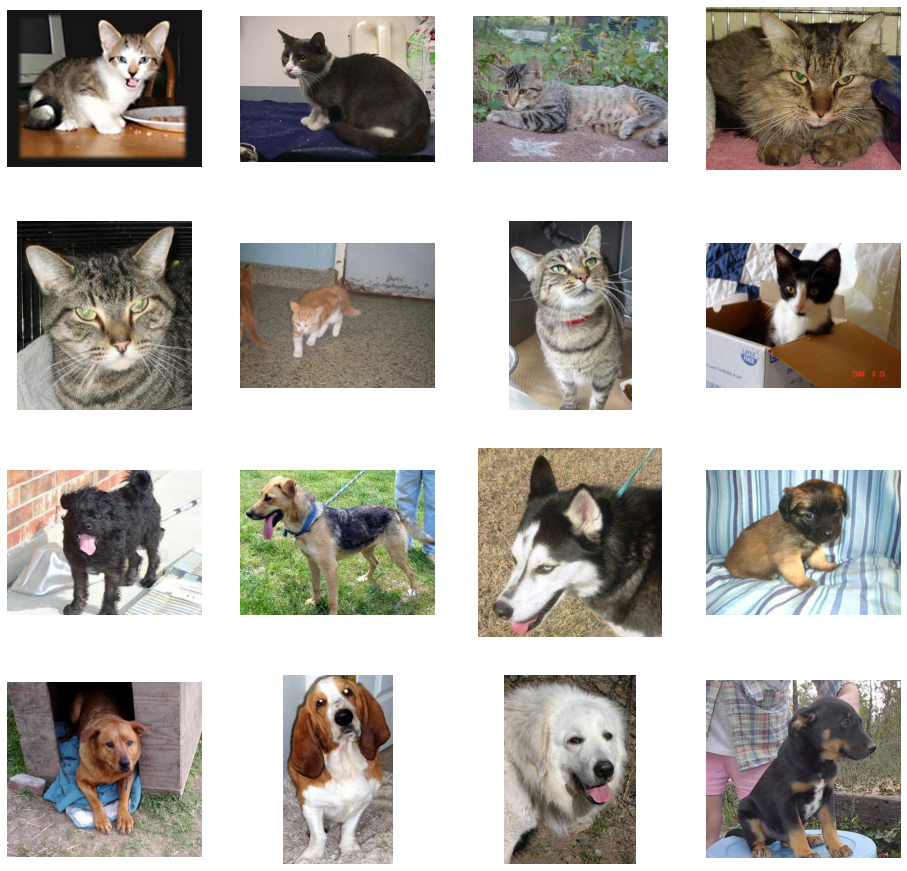

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **VGG16**

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
#Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [11]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


Epoch 1/10
100/100 [==============================] - 39s 312ms/step - loss: 1.0227 - acc: 0.5959 - val_loss: 0.3619 - val_acc: 0.8330
Epoch 2/10
100/100 [==============================] - 31s 308ms/step - loss: 0.4891 - acc: 0.7597 - val_loss: 0.3518 - val_acc: 0.8340
Epoch 3/10
100/100 [==============================] - 31s 309ms/step - loss: 0.4201 - acc: 0.8104 - val_loss: 0.2277 - val_acc: 0.9110
Epoch 4/10
100/100 [==============================] - 31s 311ms/step - loss: 0.3972 - acc: 0.8158 - val_loss: 0.3675 - val_acc: 0.8380
Epoch 5/10
100/100 [==============================] - 31s 310ms/step - loss: 0.3865 - acc: 0.8237 - val_loss: 0.4776 - val_acc: 0.7830
Epoch 6/10
100/100 [==============================] - 31s 311ms/step - loss: 0.3576 - acc: 0.8372 - val_loss: 0.1973 - val_acc: 0.9270
Epoch 7/10
100/100 [==============================] - 31s 311ms/step - loss: 0.3419 - acc: 0.8378 - val_loss: 0.2619 - val_acc: 0.8810
Epoch 8/10
100/100 [==============================] - 3

In [12]:
vgghist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

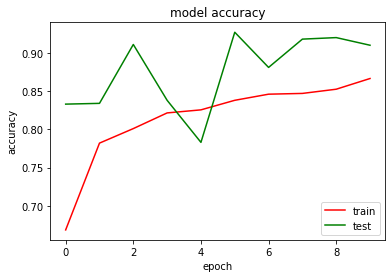

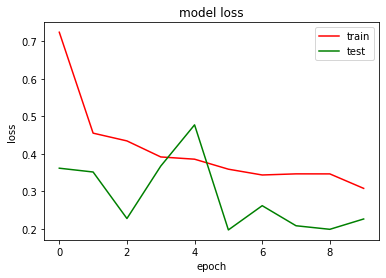

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(vgghist.history['acc'], color='red')
ax.plot(vgghist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(vgghist.history['loss'], color='red')
ax.plot(vgghist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **GoogLeNet**

In [15]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [18]:
for layer in base_model.layers:
    layer.trainable = False

In [19]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [20]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 22s 185ms/step - loss: 3.3190 - acc: 0.7771 - val_loss: 0.2169 - val_acc: 0.9460
Epoch 2/10
100/100 [==============================] - 17s 174ms/step - loss: 0.4411 - acc: 0.8974 - val_loss: 0.2500 - val_acc: 0.9340
Epoch 3/10
100/100 [==============================] - 18s 175ms/step - loss: 0.4531 - acc: 0.8911 - val_loss: 0.2201 - val_acc: 0.9510
Epoch 4/10
100/100 [==============================] - 18s 176ms/step - loss: 0.3207 - acc: 0.9182 - val_loss: 1.2993 - val_acc: 0.8360
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 0.4007 - acc: 0.9053 - val_loss: 0.5951 - val_acc: 0.8500
Epoch 6/10
100/100 [==============================] - 18s 176ms/step - loss: 0.3257 - acc: 0.9156 - val_loss: 0.1525 - val_acc: 0.9570
Epoch 7/10
100/100 [==============================] - 18s 177ms/step - loss: 0.3342 - acc: 0.9202 - val_loss: 0.1771 - val_acc: 0.9510
Epoch 8/10
100/100 [==============================] - 1

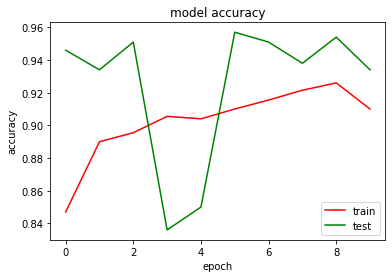

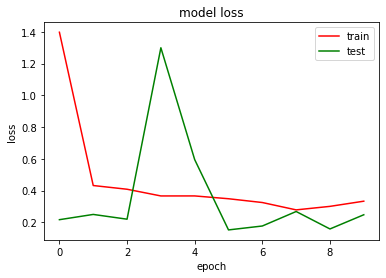

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(inc_history.history['acc'], color='red')
ax.plot(inc_history.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(inc_history.history['loss'], color='red')
ax.plot(inc_history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **ResNet50**

In [23]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 2s 0us/step


In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [27]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [28]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 42s 376ms/step - loss: 2.0284 - acc: 0.6031 - val_loss: 4.0463 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 37s 364ms/step - loss: 0.7274 - acc: 0.8101 - val_loss: 5.9598 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 36s 361ms/step - loss: 0.5081 - acc: 0.8661 - val_loss: 4.3227 - val_acc: 0.5010
Epoch 4/10
100/100 [==============================] - 36s 361ms/step - loss: 0.3572 - acc: 0.9016 - val_loss: 3.3664 - val_acc: 0.5060
Epoch 5/10
100/100 [==============================] - 36s 362ms/step - loss: 0.3117 - acc: 0.9120 - val_loss: 2.5529 - val_acc: 0.5390
Epoch 6/10
100/100 [==============================] - 36s 362ms/step - loss: 0.3831 - acc: 0.9085 - val_loss: 1.9498 - val_acc: 0.6270
Epoch 7/10
100/100 [==============================] - 36s 361ms/step - loss: 0.3262 - acc: 0.9166 - val_loss: 0.8062 - val_acc: 0.8050
Epoch 8/10
100/100 [==============================] - 3

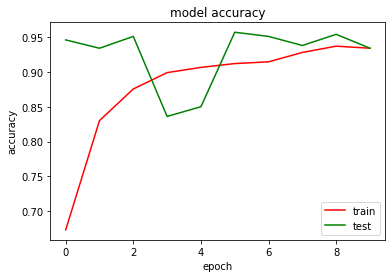

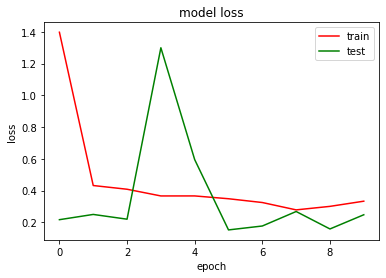

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(resnet_history.history['acc'], color='red')
ax.plot(inc_history.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(inc_history.history['loss'], color='red')
ax.plot(inc_history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **EfficientNet**

In [32]:
import efficientnet.keras as efn

In [33]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


In [39]:
for layer in base_model.layers:
    layer.trainable = False

In [50]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(base_model.input, predictions)

In [52]:
model_final.compile(optimizer =RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [53]:
eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 47s 359ms/step - loss: 0.6768 - accuracy: 0.8030 - val_loss: 0.1314 - val_accuracy: 0.9650
Epoch 2/10
100/100 [==============================] - 35s 350ms/step - loss: 0.2742 - accuracy: 0.9379 - val_loss: 0.1279 - val_accuracy: 0.9710
Epoch 3/10
100/100 [==============================] - 35s 353ms/step - loss: 0.2152 - accuracy: 0.9489 - val_loss: 0.0947 - val_accuracy: 0.9770
Epoch 4/10
100/100 [==============================] - 35s 353ms/step - loss: 0.1410 - accuracy: 0.9620 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch 5/10
100/100 [==============================] - 35s 353ms/step - loss: 0.1586 - accuracy: 0.9528 - val_loss: 0.1259 - val_accuracy: 0.9680
Epoch 6/10
100/100 [==============================] - 35s 353ms/step - loss: 0.0729 - accuracy: 0.9717 - val_loss: 0.0894 - val_accuracy: 0.9810
Epoch 7/10
100/100 [==============================] - 36s 355ms/step - loss: 0.0973 - accuracy: 0.9746 - val_loss: 0.1500 - val_ac

In [55]:
eff_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

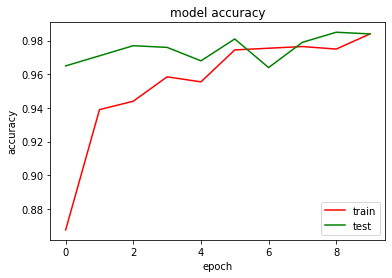

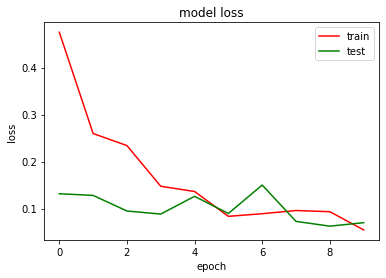

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(eff_history.history['accuracy'], color='red')
ax.plot(eff_history.history['val_accuracy'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(eff_history.history['loss'], color='red')
ax.plot(eff_history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()